# Computer Vision Foundations: Images and Filtering

<center><img src='https://miro.medium.com/max/750/1*Mu7_d3e1qPtW1e7EgsX7LQ.png' width=300px></center>
<p align="justify">

OpenCV (Open source Computer Vision - https://opencv.org/) is a famous programming library for developing real-time computer vision applications. 

*   Cross-platform;
*   Free functions to be used under the open-source BSD license:
*   Pixel-level image manipulation, camera calibration, 3-D reconstruction, feature points detectors, matching algorithms, motion extraction, feature tracking;
*   Support for models developed with various deep learning frameworks (e.g., TensorFlow, PyTorch, Caffe);

OpenCV Website: (https://opencv.org/).

## **Load and visualize an image**

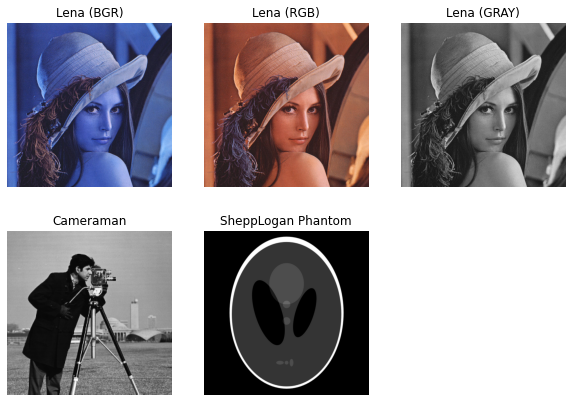

In [ ]:
# Import libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read images into the workspace
lena = cv2.imread('./2_images/lena.bmp') # BGR image
lena_rgb = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB) # RGB image
lena_gs = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY) # GS image
# lena_gs = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)

cameraman = cv2.imread('./2_images/cameraman.tif')
sp_phantom = cv2.imread('./2_images/SheppLogan_Phantom.png')

# Plot rgb/grayscale images
plt.figure(figsize=(10, 7))
plt.subplot(2,3,1), plt.imshow(lena), plt.title('Lena (BGR)'), plt.axis('off')
plt.subplot(2,3,2), plt.imshow(lena_rgb), plt.title('Lena (RGB)'), plt.axis('off')
plt.subplot(2,3,3), plt.imshow(lena_gs, cmap=plt.cm.gray), plt.title('Lena (GRAY)'), plt.axis('off')
plt.subplot(2,3,4), plt.imshow(cameraman), plt.title('Cameraman'), plt.axis('off')
plt.subplot(2,3,5), plt.imshow(sp_phantom), plt.title('SheppLogan Phantom'), plt.axis('off')
plt.show()

In [ ]:
# Print images properties
print('"Lena" image Information\n')
print("Number of Pixels: " + str(lena_rgb.size))
print("Image (RGB) shape: " + str(lena_rgb.shape))
print("Image (GRAY) shape: " + str(lena_gs.shape))
print("Image type:  " + str(type(lena_rgb)))

# Save image shape
(height, width, channels) = lena_rgb.shape

"Lena" image Information

Number of Pixels: 786432
Image (RGB) shape: (512, 512, 3)
Image (GRAY) shape: (512, 512)
Image type:  <class 'numpy.ndarray'>


## **Image histogram**

The histogram provides a general understanding regarding the contrast, brightness, and intensity distribution of an image.

Both Matplolib and OpenCV libraries can be used to compute an image histogram.

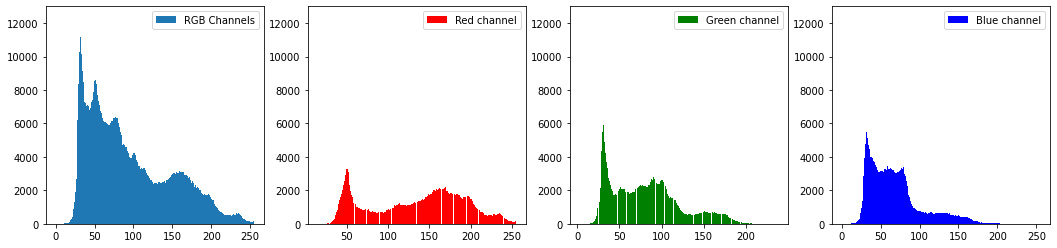

In [ ]:
# Compute image histogram using matplotlib library
# Find frequency of pixels in range 0-255
plt.figure(figsize=(18,4))
plt.subplot(1,4,1), plt.ylim(0, 13000)
_ = plt.hist(lena_rgb.flatten(), bins = 256)
_ = plt.legend(['RGB Channels'])
plt.subplot(1,4,2), plt.ylim(0, 13000)
_ = plt.hist(lena_rgb[:, :, 0].flatten(), bins = 256, color = 'r')
_ = plt.legend(['Red channel'])
plt.subplot(1,4,3), plt.ylim(0, 13000)
_ = plt.hist(lena_rgb[:, :, 1].flatten(), bins = 256, color = 'g')
_ = plt.legend(['Green channel'])
plt.subplot(1,4,4), plt.ylim(0, 13000)
_ = plt.hist(lena_rgb[:, :, 2].flatten(), bins = 256, color = 'b')
_ = plt.legend(['Blue channel'])

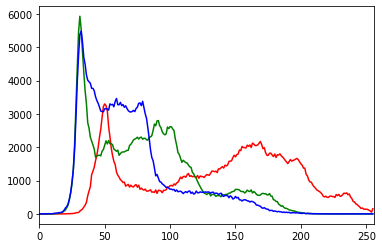

In [ ]:
# Image histogram using OpenCV 
# cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) → hist
color = ('r','g','b')
for i, col in enumerate(color):
    hist = cv2.calcHist([lena_rgb], [i], None, [256], [0,256])
    plt.plot(hist, color = col)
    plt.xlim([0,256])

## **Split and Merge Image Channels**

In [ ]:
#cv2.split(m[, mv]) → mv
# Warning: cv2.split() is a costly operation (in terms of time). 
# So do it only if you need it. Otherwise go for Numpy indexing.
blue_ch, green_ch, red_ch = cv2.split(lena)
print("Blue channel shape: " + str(blue_ch.shape))
print("Green channel shape: " + str(green_ch.shape))
print("Red channel shape: " + str(red_ch.shape))

Blue channel shape: (512, 512)
Green channel shape: (512, 512)
Red channel shape: (512, 512)


In [ ]:
# cv2.merge(mv[, dst]) → dst
# Creates one multichannel array out of several single-channel ones.
zeros = np.zeros(blue_ch.shape, np.uint8)
lena_blue = cv2.merge((blue_ch, zeros, zeros))
lena_green = cv2.merge((zeros, green_ch, zeros))
lena_red = cv2.merge((zeros, zeros, red_ch))
print("lena_blue shape: " + str(lena_blue.shape))
print("lena_green shape: " + str(lena_green.shape))
print("lena_red shape: " + str(lena_red.shape))

lena_blue shape: (512, 512, 3)
lena_green shape: (512, 512, 3)
lena_red shape: (512, 512, 3)


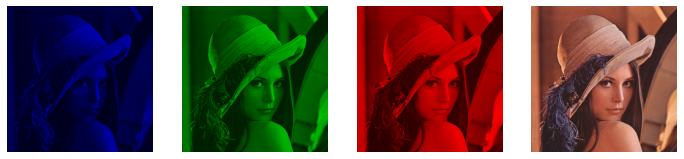

In [ ]:
# Plot all images
images = [lena_blue, lena_green, lena_red, lena]
fig, ax = plt.subplots(nrows = 1, ncols = len(images), figsize = (3*len(images), 3*len(images)))
for i, p in enumerate(images):
  ax[i].imshow(cv2.cvtColor(p, cv2.COLOR_BGR2RGB))
  ax[i].axis('off')
plt.show()

## Image Thresholding

Image thresholding can be used to segment an image. Setting all pixel values above the threshold to a maximum value (e.g., 255) and below the threshold to zero, we get a binary image.

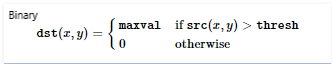

In the next exercise, we will set to zero all the pixel values below four fixed thresholds (30, 60, 90 and 120) and plot the resulting images. Use the gray scale version of Lena image. Use NumPy or OpenCV (cv2.threshold) to solve this exercise.



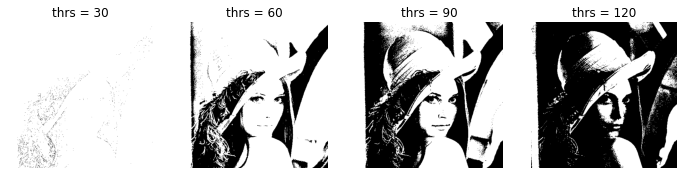

In [ ]:
# Perform binary thresholding using four different values: 30, 60, 90, 120.
# As input image, use a grayscale image. 

# Using Numpy

thrs= [130,60,90,120]
fig, ax = plt.subplots(nrows = 1, ncols = len(thrs), figsize = (3*len(thrs),3*len (thrs)))
for i, thr in enumerate (thrs) :
    img = np.where(lena_gs <= int(thr), 0, 255)
    ax[i].imshow(img, cmap=plt.cm.gray)
    ax[i].axis('off')
    ax[i].set_title(f'thrs = {thr}')
plt.show()

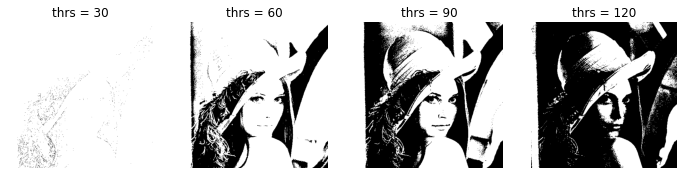

In [ ]:
# OpenCV2 example
# cv2.threshold(src, thresh, maxval, type[, dst]) → retval, dst
# It returns the used threshold and the thresholded image.


thrs = [30,60,90,120]

fig, ax = plt. subplots(nrows = 1, ncols = len(thrs), figsize = (3*len(thrs), 3*len(thrs)))

for i, thr in enumerate (thrs) :
    _, img = cv2.threshold(lena_gs, int(thr), 255, cv2.THRESH_BINARY) 
    ax[i].imshow(img, cmap=plt.cm.gray)
    ax[i].axis('off')
    ax[i].set_title(f'thrs = {thr}')
plt. show()

## **Image rotation**

In [ ]:
# Rotate an input image by 90 degrees 
# Firstly, we need to compute the rotation matrix and then apply it to the input image.
# cv2.getRotationMatrix2D(center, angle, scale) → retval
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)
print(f"Rotation matrix (90 deg):\n{rotation_matrix}")

Rotation matrix (90 deg):
[[ 6.12323400e-17  1.00000000e+00 -2.84217094e-14]
 [-1.00000000e+00  6.12323400e-17  5.12000000e+02]]


In [ ]:
# Apply an affine transformation to the input image.
# cv.WarpAffine(src, dst, mapMatrix, flags=CV_INTER_LINEAR+CV_WARP_FILL_OUTLIERS, fillval=(0, 0, 0, 0)) → None
lena_rotated = cv2.warpAffine(lena, rotation_matrix, (width, height)) # define output size

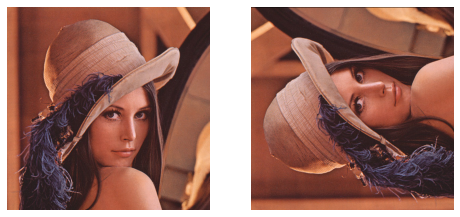

In [ ]:
# Plot images
plt.figure(figsize=(8, 5))
plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(lena_rotated, cv2.COLOR_BGR2RGB)), plt.axis('off')
plt.show()

In [ ]:
# Rotate by 45 degrees and set scale to 0.5
rotation_scaling_matrix = cv2.getRotationMatrix2D((width/2, height/2), 45, 0.5)
lena_rotated_scaled = cv2.warpAffine(lena, rotation_scaling_matrix, (width, height))
print(f"Rotation matrix (45 deg) + scaling:\n{rotation_scaling_matrix}")

Rotation matrix (45 deg) + scaling:
[[  0.35355339   0.35355339  74.98066402]
 [ -0.35355339   0.35355339 256.        ]]


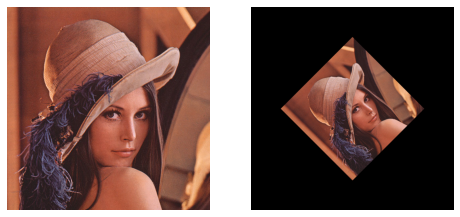

In [ ]:
# Plot images
plt.figure(figsize=(8, 5))
plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(lena_rotated_scaled, cv2.COLOR_BGR2RGB)), plt.axis('off')
plt.show()

## **Image Resizing and Cropping**

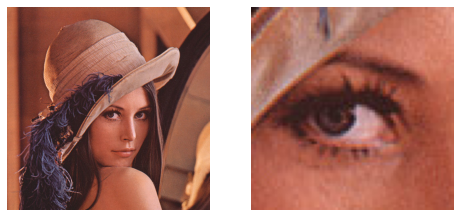

In [ ]:
startRow = int(height * .45)
startCol = int(width  * .45)
endRow   = int(height * .60)
endCol   = int(width  * .60)

# Crop image
lena_cropped = lena[startRow:endRow, startCol:endCol]

# Plot images
plt.figure(figsize=(8, 5))
plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(lena_cropped, cv2.COLOR_BGR2RGB)), plt.axis('off')
plt.show()

In [ ]:
# Image resizing
# cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) → dst
lena_resized = cv2.resize(lena, (300, 200)) # (width, height)
print("Original image (shape): " + str(lena.shape))
print("Scaled image (shape):  " + str(lena_resized.shape))

Original image (shape): (512, 512, 3)
Scaled image (shape):  (200, 300, 3)


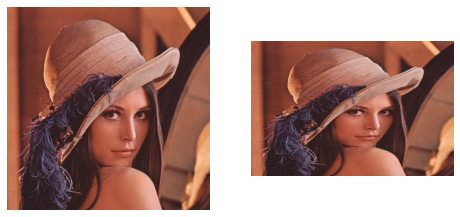

In [ ]:
# Plot images
plt.figure(figsize=(8, 5))
plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(lena_resized, cv2.COLOR_BGR2RGB)), plt.axis('off')
plt.show()

# **2-D Convolution**
2-D convolution can be used to apply smoothing, sharpening or edge detection filters to images. The output image is produced by sliding a kernel (filter) over the input image.

[Here](https://setosa.io/ev/image-kernels/) you can see the output of a number of filters.

# Box Blur (box linear filter)

In this exercise, we will implement two functions for applying a box filter to an input image using the NumPy library. Firstly, we will define a function to create a $k \times k$ blur filter. Then, a function to perform the 2-D convolution operator. Consider a grayscale input image, stride equals to 1 to obtain a blurred image as output. Input and output images should have the same spatial size.

We will use zero-padding to get the same spatial size for both input and output images. The padding size should be set to $\frac{k-1}{2}$, where $k$ is the kernel size.


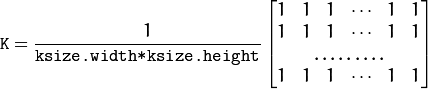

In [ ]:
def box_filter(kernel_size):
  '''
  Create a k x k box filter.
  
  Input parameters
  ----------------
  kernel_size: int 
    Size of the squared kernel.

  Output parameters
  ----------------
  Filter: np.array [k x k]
    Box filter

  To check
  ------------
  kernel size must be an odd number
  '''

  assert kernel_size % 2 != 0

  kernel = np.ones([kernel_size, kernel_size]) / kernel_size**2

  return kernel

In [ ]:
def conv_2d(image, kernel):
  '''
  Apply a k x k filter to the input image.
  
  Input parameters
  ----------------
  image: np.array
    Input image.
  kernel: np.array [k x k]
    Filter to apply

  Output parameters
  ----------------
  Image: np.array

  To check
  ------------
  Grayscale image is required
  '''

  assert len (image.shape) == 2

  kernel_size = kernel.shape[0]

  image = np.asarray(image,dtype=np.float32)

  output = np.zeros_like(image)

  kernel = np.flipud(np.fliplr(kernel))

  padding_size = (kernel_size - 1)//2

  img_padded = np.pad(image, (padding_size, padding_size))
  h,w = image.shape
  for row in range(h):
    for col in range(w):
      output[row,col] = (img_padded[row:row+kernel_size, col:col+kernel_size]*kernel).sum()
  return output

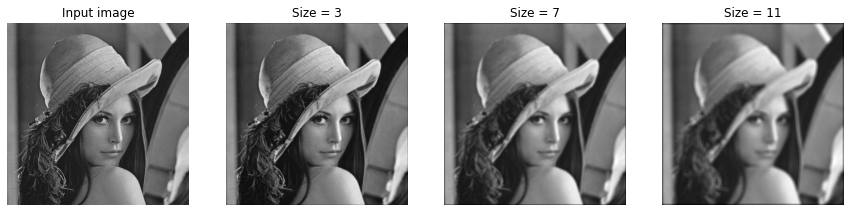

In [ ]:
# Apply the box filter to the lena_gs image.
# Use three different sizes for the box filter: 3, 7 and 11.
lena_box3 = conv_2d(lena_gs, box_filter(3))
lena_box7 = conv_2d(lena_gs, box_filter(7))
lena_box11 = conv_2d(lena_gs, box_filter(11))
plt.figure(figsize=(15,10))
plt.subplot(1, 4, 1), plt.imshow(lena_gs, cmap=plt.cm.gray), plt.axis('off'), plt.title('Input image')
plt.subplot(1, 4, 2), plt.imshow(lena_box3, cmap=plt.cm.gray), plt.axis('off'), plt.title('Size = 3')
plt.subplot(1, 4, 3), plt.imshow(lena_box7, cmap=plt.cm.gray), plt.axis('off'), plt.title('Size = 7')
plt.subplot(1, 4, 4), plt.imshow(lena_box11, cmap=plt.cm.gray), plt.axis('off'), plt.title('Size = 11')
plt.show()

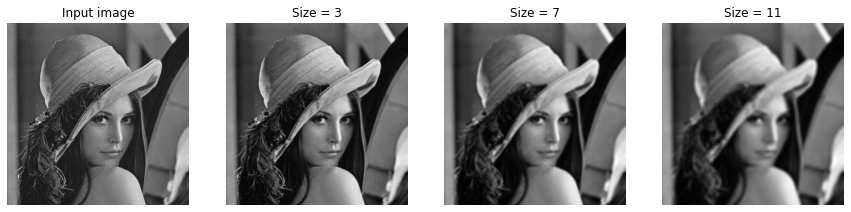

In [ ]:
# OpenCV provides a box filter.
# cv2.blur(src, ksize[, dst[, anchor[, borderType]]]) → dst
lena_box3_cv = cv2.blur(np.asarray(lena_gs, dtype=np.float32), (3,3))
lena_box7_cv = cv2.blur(np.asarray(lena_gs, dtype=np.float32), (7,7))
lena_box11_cv = cv2.blur(np.asarray(lena_gs, dtype=np.float32), (11,11))
plt.figure(figsize=(15,10))
plt.subplot(1, 4, 1), plt.imshow(lena_gs, cmap=plt.cm.gray), plt.axis('off'), plt.title('Input image')
plt.subplot(1, 4, 2), plt.imshow(lena_box3_cv, cmap=plt.cm.gray), plt.axis('off'), plt.title('Size = 3')
plt.subplot(1, 4, 3), plt.imshow(lena_box7_cv, cmap=plt.cm.gray), plt.axis('off'), plt.title('Size = 7')
plt.subplot(1, 4, 4), plt.imshow(lena_box11_cv, cmap=plt.cm.gray), plt.axis('off'), plt.title('Size = 11')
plt.show()

In [ ]:
# Let's check if the results obtained with NumPy and OpenCV are different.
print("Results checking...")
print("Difference between output images (3x3 kernel): " + str(np.abs(lena_box3 - lena_box3_cv).sum()))
print("Difference between output images (7x7 kernel): " + str(np.abs(lena_box7 - lena_box7_cv).sum()))
print("Difference between output images (11x11 kernel): " + str(np.abs(lena_box11 - lena_box11_cv).sum()))

Results checking...
Difference between output images (3x3 kernel): 72894.77
Difference between output images (7x7 kernel): 187619.77
Difference between output images (11x11 kernel): 298442.8


The results are different. Why? Let's find out..

In [ ]:
# Let's remove the borders from the output images
print("Results checking (without borders)...")
noborders_diff_3 = lena_box3[1:-1, 1:-1] - lena_box3_cv[1:-1, 1:-1]
noborders_diff_7 = lena_box7[3:-3, 3:-3] - lena_box7_cv[3:-3, 3:-3]
noborders_diff_11 = lena_box11[5:-5, 5:-5] - lena_box11_cv[5:-5, 5:-5]

print("Difference (3 x 3 kernel): " + str(np.abs(noborders_diff_3).sum()))
print("Difference (7 x 7 kernel): " + str(np.abs(noborders_diff_7).sum()))
print("Difference (11 x 11 kernel): " + str(np.abs(noborders_diff_11).sum()))

Results checking (without borders)...
Difference (3 x 3 kernel): 0.0
Difference (7 x 7 kernel): 0.0
Difference (11 x 11 kernel): 0.0


The cv2.blur function does not use zero-padding!

# 2-D Gaussian Filter**

In this exercise, we will implement with Numpy a $k\times k$ Gaussian filter defined by the following equation:

$$
G(x, y) = \frac{1}{\sqrt{2 \pi \sigma^2}}{e^{-\frac{x^2+y^2}{2\sigma^2}}}
$$

In [ ]:
def gaussian_2d(size=11, sigma=1):
    """
    2-D Gaussian Filter

    Input Parameters
    ----------------
    size: int
      Size of the squared kernel 
    sigma: float
      Standard deviation

    Output Parameter
    ----------------
    filter: np.array
      2-D Gaussian Filter
    """
    
    # Check input parameters
    assert size % 2 != 0, "Kernel size must be an odd number."
    ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = 1/(np.sqrt(2 * np.pi * np.square(sigma))) * np.exp(-0.5*(np.square(xx) + np.square(yy)) / np.square(sigma))
    return kernel / np.sum(kernel)

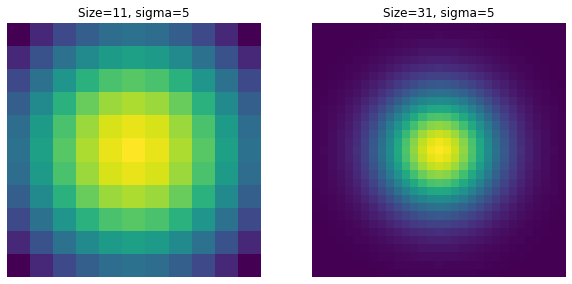

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(gaussian_2d(size=11, sigma=5)), plt.title('Size=11, sigma=5'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(gaussian_2d(size=31, sigma=5)), plt.title('Size=31, sigma=5'), plt.axis('off')
plt.show()

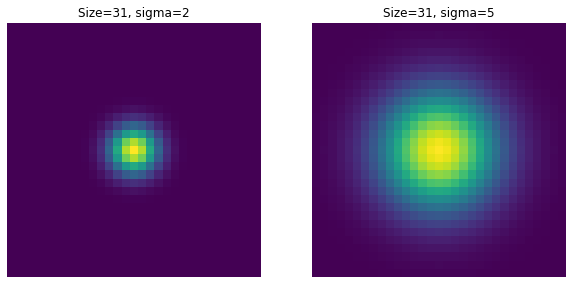

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(gaussian_2d(size=31, sigma=2)), plt.title('Size=31, sigma=2'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(gaussian_2d(size=31, sigma=5)), plt.title('Size=31, sigma=5'), plt.axis('off')
plt.show()

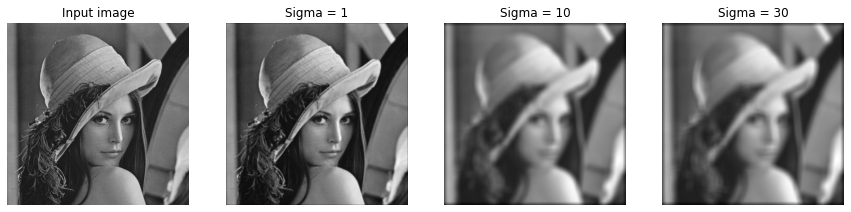

In [ ]:
# Apply the box filter to the lena_gs image.
lena_gaussian_1 = conv_2d(lena_gs, gaussian_2d(size=21, sigma=1))
lena_gaussian_10 = conv_2d(lena_gs, gaussian_2d(size=21, sigma=10))
lena_gaussian_30 = conv_2d(lena_gs, gaussian_2d(size=21, sigma=30))
plt.figure(figsize=(15,10))
plt.subplot(1, 4, 1), plt.imshow(lena_gs, cmap=plt.cm.gray), plt.axis('off'), plt.title('Input image')
plt.subplot(1, 4, 2), plt.imshow(lena_gaussian_1, cmap=plt.cm.gray), plt.axis('off'), plt.title('Sigma = 1')
plt.subplot(1, 4, 3), plt.imshow(lena_gaussian_10, cmap=plt.cm.gray), plt.axis('off'), plt.title('Sigma = 10')
plt.subplot(1, 4, 4), plt.imshow(lena_gaussian_30, cmap=plt.cm.gray), plt.axis('off'), plt.title('Sigma = 30')
plt.show()

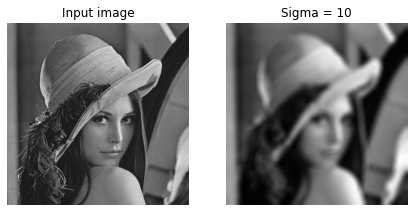

In [ ]:
# OpenCV provides the cv2.gaussianblur() function to apply a Gaussian Smoothing to the input image
# dst = cv2.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType=BORDER_DEFAULT]]] )
dst = cv2.GaussianBlur(lena_gs, (21,21), 10)
plt.figure(figsize=(15,10))
plt.subplot(1, 4, 1), plt.imshow(lena_gs, cmap=plt.cm.gray), plt.axis('off'), plt.title('Input image')
plt.subplot(1, 4, 2), plt.imshow(dst, cmap=plt.cm.gray), plt.axis('off'), plt.title('Sigma = 10')
plt.show()

# **Noise Removal**

<p align="justify">Image noise is an undesired effect produced by image sensors or external factors which may obscure the information.</p>

**Noise Removal by Linear Filtering**

<p align="justify">Linear filtering can be used to remove certain types of noise. The following example shows how to remove salt and pepper noise from an image using a median filter (box filter can also be used).</p>

<p align="justify">Box filter sets the value of the output pixel to the average of the pixel values in the neighborhood around the corresponding input pixel. Using the median filter, the value of the output pixel is defined by the median of the neighborhood pixels, rather than the mean. For this reason, the median filter is less sensitive than the mean filter to extreme values (outliers) and it does not reduce the sharpness of the image.</p>

In [ ]:
def salt_pepper_noise(image, ratio, amount):
  '''
    Simulate salt&pepper noise for an input grayscale image.
    
    Input Parameters
    ----------------
    image: np.array
      Input image
    ratio: float between 0 and 1
      Salt and pepper noise ratio.
    amount:  float between 0 and 1
      Amount of noise.

    Output parameter
    ----------------
    image: np.array
  '''
  
  # Check input parameters
  assert len(image.shape) == 2, f"Input image has {image.shape[-1]} channels. \
                                  Grayscale image is required."
  assert 0. <= ratio <= 1., "Ratio parameter must be between 0 and 1."
  assert 0. <= amount <= 1., "Amount parameter must be between 0 and 1."
  
  # Extract image dimensions
  row, col = image.shape
  output = np.copy(image)
  
  # Apply salt noise to each pixel individually
  num_salt = np.ceil(amount * image.size * ratio)
  coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
  for i in zip(coords[0], coords[1]):
    output[i] = 255 # set to salt value

  # Apply pepper noise to each pixel individually
  num_pepper = np.ceil(amount * image.size * (1. - ratio))
  coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
  for i in zip(coords[0], coords[1]):
    output[i] = 0 # set to pepper value

  return output

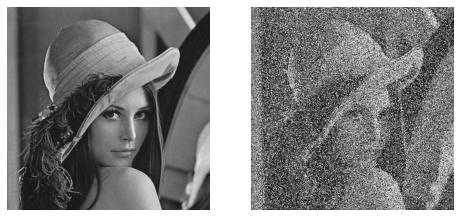

In [ ]:
lena_salt_pepper = salt_pepper_noise(lena_gs, 0.6, 0.55)
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1), plt.imshow(lena_gs, cmap=plt.cm.gray), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(lena_salt_pepper, cmap=plt.cm.gray), plt.axis('off')
plt.show()

# Median filter

Implement the median filter replacing each pixel of the input image with the median of its neighborhood (use a $k\times k$ "patch"). The kernel must be an odd number. 

Use a boolean input parameter "padding" to pad (if True) or not (if False) the input image. If padding is True, the input and output image will have the same spatial size.

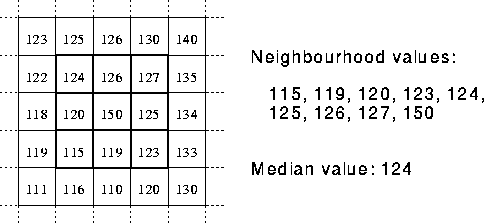

In [ ]:
def median_filter(image, kernel_size, padding=True):
  '''
  This function applies the median filter to the input image.

  Input Parameters
  -----------------
  image: np.array
    Input grayscale image
  kernel_size: int 
    Dimension of a squared kernel.
  Padding: bool
    If True, the input image is padded with zeros in order to have as output
    an image with the same spatial size of the input image. 
    If False, no padded is applied and the output image will be smaller than
    the input one.

  Output Parameters
  ----------------
  image: np.array
    Filtered image

  To check
  ------------
  Grayscale image is required
  kernel size must be an odd number
  '''
  
  # Check inputs
  assert len(image.shape) == 2
  assert kernel_size & 2 != 0
  image = np.asarray(image,dtype=np.float32)
  h, w = image.shape
  if padding:
    output = np.zeros_like(image)
    padding_size = (kernel_size - 1)//2
    img_padded = np.pad(image,(padding_size, padding_size))
    for row in range(h):
      for col in range(w):
        output[row, col] = np.median(img_padded[row: row+kernel_size, col:col+kernel_size])
    else:
      out_h= h - kernel_size + 1
      out_W= w - kernel_size + 1
      output = np.zeros([out_h, out_w])
      for row in range (out_h):
        for col in range(out_w):
          output[row, col] = np.median(image[row:row+kernel_size,col:col+kernel_size])
  return output

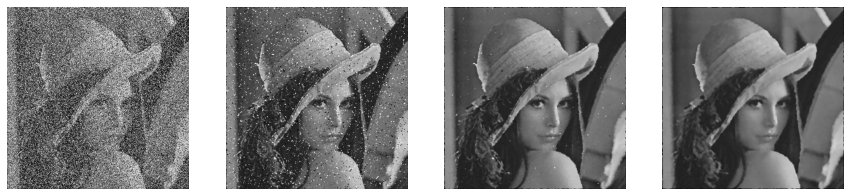

In [ ]:
# Apply the median filter to the lena_salt_pepper image.
# Use as kernel size: 3, 5 and 7.
lena_median3 = median_filter(lena_salt_pepper, 3)
lena_median5 = median_filter(lena_salt_pepper, 5)
lena_median7 = median_filter(lena_salt_pepper, 7)
plt.figure(figsize=(15, 12))
plt.subplot(1, 4, 1), plt.imshow(lena_salt_pepper, cmap=plt.cm.gray), plt.axis('off')
plt.subplot(1, 4, 2), plt.imshow(lena_median3, cmap=plt.cm.gray), plt.axis('off')
plt.subplot(1, 4, 3), plt.imshow(lena_median5, cmap=plt.cm.gray), plt.axis('off')
plt.subplot(1, 4, 4), plt.imshow(lena_median7, cmap=plt.cm.gray), plt.axis('off')
plt.show()

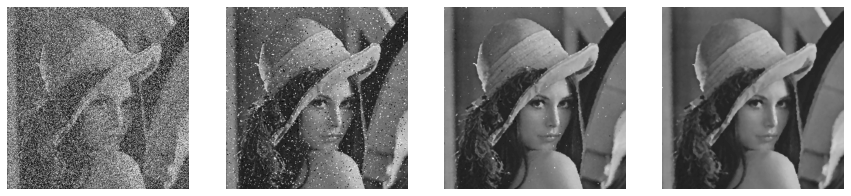

In [ ]:
# We will now use the median filter provided by OpenCV.
# cv2.medianBlur(src, ksize[, dst]) → dst
lena_median3_cv = cv2.medianBlur(lena_salt_pepper, 3)
lena_median5_cv = cv2.medianBlur(lena_salt_pepper, 5)
lena_median7_cv = cv2.medianBlur(lena_salt_pepper, 7)
plt.figure(figsize=(15, 12))
plt.subplot(1, 4, 1), plt.imshow(lena_salt_pepper, cmap=plt.cm.gray), plt.axis('off')
plt.subplot(1, 4, 2), plt.imshow(lena_median3_cv, cmap=plt.cm.gray), plt.axis('off')
plt.subplot(1, 4, 3), plt.imshow(lena_median5_cv, cmap=plt.cm.gray), plt.axis('off')
plt.subplot(1, 4, 4), plt.imshow(lena_median7_cv, cmap=plt.cm.gray), plt.axis('off')
plt.show()

In [ ]:
print("Results checking...")
print("Difference (3x3 kernel): " + str(np.abs(lena_median3 - lena_median3_cv).sum()))
print("Difference (5x5 kernel): " + str(np.abs(lena_median5 - lena_median5_cv).sum()))
print("Difference (7x7 kernel): " + str(np.abs(lena_median7 - lena_median7_cv).sum()))

Results checking...
Difference (3x3 kernel): 65602.0
Difference (5x5 kernel): 129061.0
Difference (7x7 kernel): 198611.0


In [ ]:
print("Results checking (without borders)...")
# Remove borders from output images
cropped_diff_3 = lena_median3[1:-1, 1:-1] - lena_median3_cv[1:-1, 1:-1]
cropped_diff_5 = lena_median5[2:-2, 2:-2] - lena_median5_cv[2:-2, 2:-2]
cropped_diff_7 = lena_median7[3:-3, 3:-3] - lena_median7_cv[3:-3, 3:-3]

print("Difference (3x3 kernel): " + str(np.abs(cropped_diff_3).sum()))
print("Difference (5x5 kernel): " + str(np.abs(cropped_diff_5).sum()))
print("Difference (7x7 kernel): " + str(np.abs(cropped_diff_7).sum()))

Results checking (without borders)...
Difference (3x3 kernel): 0.0
Difference (5x5 kernel): 0.0
Difference (7x7 kernel): 0.0


*   Now, let's use the median_filter function setting to False the padding parameter. The input image will be padded using the cv2.copyMakeBorder function.

In [ ]:
# Form a border around an image.
# cv2.copyMakeBorder(src, top, bottom, left, right, borderType[, dst[, value]]) → dst
# Note: The median filter uses cv2.BORDER_REPLICATE internally to cope with border pixels.
lena_salt_pepper_rep_b1 = cv2.copyMakeBorder(lena_salt_pepper, 1, 1, 1, 1, cv2.BORDER_REPLICATE)
lena_salt_pepper_rep_b2 = cv2.copyMakeBorder(lena_salt_pepper, 2, 2, 2, 2, cv2.BORDER_REPLICATE)
lena_salt_pepper_rep_b3 = cv2.copyMakeBorder(lena_salt_pepper, 3, 3, 3, 3, cv2.BORDER_REPLICATE)

# Apply median filter function without padding the input image (since it is already padded)
lena_median_rep_borders3 = median_filter(lena_salt_pepper_rep_b1, 3, padding=False)
lena_median_rep_borders5 = median_filter(lena_salt_pepper_rep_b2, 5, padding=False)
lena_median_rep_borders7 = median_filter(lena_salt_pepper_rep_b3, 7, padding=False)

# Let's check the difference between the two results
diff_3 = lena_median_rep_borders3 - lena_median3_cv
diff_5 = lena_median_rep_borders5 - lena_median5_cv
diff_7 = lena_median_rep_borders7 - lena_median7_cv
print("Difference (3x3 kernel): " + str(np.abs(diff_3).sum()))
print("Difference (5x5 kernel): " + str(np.abs(diff_5).sum()))
print("Difference (7x7 kernel): " + str(np.abs(diff_7).sum()))


Difference (3x3 kernel): 0.0
Difference (5x5 kernel): 0.0
Difference (7x7 kernel): 0.0


# **Filter2D function**

OpenCV provides a function for applying an arbitrary linear filter to an image.

*cv2.filter2D* function convolves an image with a kernel ([cv2.filter2D](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04)).

In [ ]:
# cv2.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) → dst

# Application of several filter to a gray scale image
# Define the kernel size
kernel_size = 3

# This filter has no effects on the image
kernel_orig = np.zeros((kernel_size,kernel_size)) 
kernel_orig[1,1] = 1

# Shift all pixels on the right by one pixel
kernel_shift = np.zeros((kernel_size, kernel_size))
kernel_shift[1,2] = 1

# Box Filter
kernel_blur = 1/(kernel_size**2) * np.ones((kernel_size,kernel_size)) 

# Horizontal_blur
horizontal_blur = np.zeros((kernel_size,kernel_size))
horizontal_blur[1, :] = 1/kernel_size

# Vertical_blur
vertical_blur = np.zeros((kernel_size,kernel_size))
vertical_blur[:, 1] = 1/kernel_size

# Print kernel filters
print(f"No effect filter:\n{kernel_orig}\n\n")
print(f"Shift filter:\n{kernel_shift}\n\n")
print(f"Blur filter: \n{kernel_blur}\n\n")
print(f"Horizontal blur filter:\n{horizontal_blur}\n\n")
print(f"Vertical blur filter:\n{vertical_blur}\n\n")

No effect filter:
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


Shift filter:
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]


Blur filter: 
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


Horizontal blur filter:
[[0.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333]
 [0.         0.         0.        ]]


Vertical blur filter:
[[0.         0.33333333 0.        ]
 [0.         0.33333333 0.        ]
 [0.         0.33333333 0.        ]]




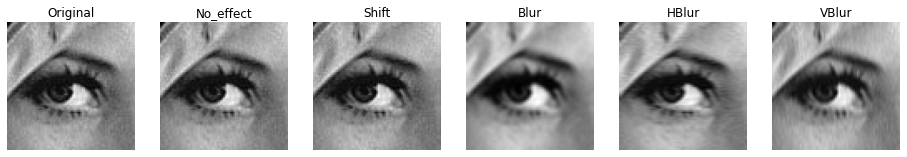

In [ ]:
# Apply filters
lena_cropped_gs = cv2.cvtColor(lena_cropped, cv2.COLOR_BGR2GRAY) # GS image

img_orig  = cv2.filter2D(lena_cropped_gs, -1, kernel_orig)
img_shift = cv2.filter2D(lena_cropped_gs, -1, kernel_shift)
img_blur  = cv2.filter2D(lena_cropped_gs, -1, kernel_blur)
img_hblur = cv2.filter2D(lena_cropped_gs, -1, horizontal_blur)
img_vblur = cv2.filter2D(lena_cropped_gs, -1, vertical_blur)

plt.figure(figsize=(16,14))
plt.subplot(1, 6, 1), plt.imshow(lena_cropped_gs, cmap=plt.cm.gray), plt.title('Original'), plt.axis('off')
plt.subplot(1, 6, 2), plt.imshow(img_orig, cmap=plt.cm.gray), plt.title('No_effect'),  plt.axis('off')
plt.subplot(1, 6, 3), plt.imshow(img_shift, cmap=plt.cm.gray), plt.title('Shift'),  plt.axis('off')
plt.subplot(1, 6, 4), plt.imshow(img_blur, cmap=plt.cm.gray), plt.title('Blur'),  plt.axis('off')
plt.subplot(1, 6, 5), plt.imshow(img_hblur, cmap=plt.cm.gray), plt.title('HBlur'),  plt.axis('off')
plt.subplot(1, 6, 6), plt.imshow(img_vblur, cmap=plt.cm.gray), plt.title('VBlur'),  plt.axis('off')
plt.show()

# Sharpening filter**

While blurring reduces edge contents, sharpening increases them. 

A sharpening filter can be obtained in two steps: firstly, a smoothed version of the input image it is subtracted from the input one to obtain the details; then, the details are added to the original image.

**Step 1**: Original - Smoothed = Details

**Step 2**: Original + k * Details = Sharpened

In this exercise, we will implement a sharpening filter selecting 3 different values for the parameter k (for example, 1, 2 and 3). Use a $21 \times 21$ filter and the gray scale version of Lena image.

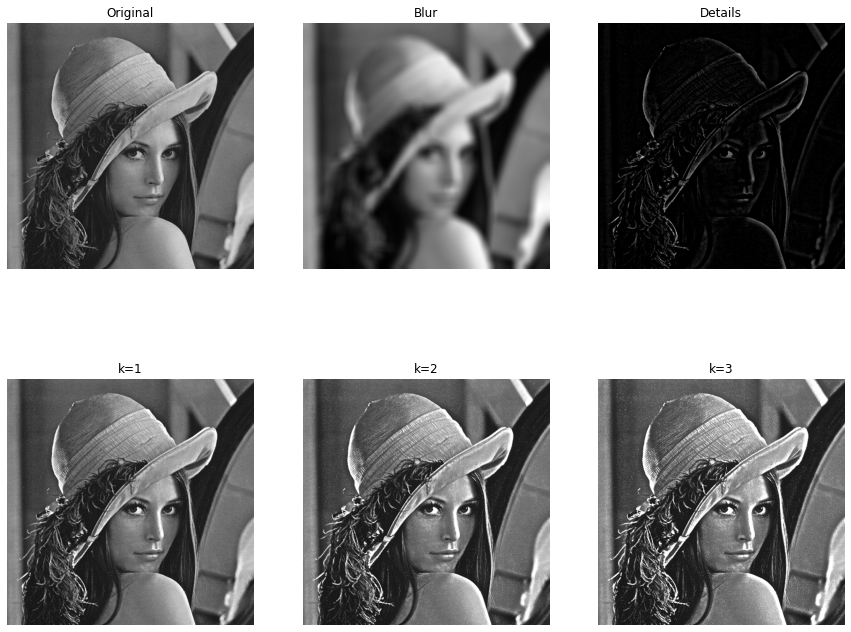

In [ ]:
lena_blur = cv2. GaussianBlur(lena_gs, (21,21), 10)
lena_details = cv2.addWeighted(lena_gs,1, lena_blur, -1,0)

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15,12))
ax[0,0].imshow(lena_gs, cmap=plt.cm.gray)
ax[0,0].axis('off')
ax[0,0].set_title('Original')

ax[0,1].imshow(lena_blur, cmap=plt.cm.gray)
ax[0,1].axis('off')
ax[0,1].set_title('Blur')

ax[0,2].imshow(lena_details, cmap=plt.cm.gray)
ax[0,2].axis('off')
ax[0,2].set_title('Details')

for i,k in enumerate([1,2,3]):
    lena_sharp = cv2.addWeighted(lena_gs,1,lena_details,k, 0)
    ax[1,i].imshow(lena_sharp, cmap=plt.cm.gray)
    ax[1,i].axis('off')
    ax[1,i].set_title(f'k={k}')

## Contra-harmonic mean filter

The contra-harmonic mean filter is a non-linear mean filter typically used for removing several types of noise (e.g., Gaussian noise, salt&pepper noise, ...). It uses only one parameter (the filter order Q). 

Positive values of Q eliminate pepper noise, while negative values of Q eliminate salt noise.



\begin{equation}
\hat{f}(x, y) = \frac{\sum_{(s, t) \in S_{xy}} g(s,t)^{Q+1}}{\sum_{(s, t) \in S_{xy}} g(s,t)^Q}
\end{equation}

In [ ]:
def contraharmonic_mean(image, kernel_size, Q):
  '''
  Apply a contraharmonic filter to the input image.

  Input Parameters
  ----------------
  image: np.array
    Grayscale image
  kernel_size: int
  Q: int
    Order of the filter
  
  Output Parameters
  -----------------
  image: np.array
    Filtered image
  '''

  num = np.power(image, Q + 1)
  denom = np.power(image, Q)
  
  # "Summation" filter
  kernel = np.full(kernel_size, 1.0)
  
  # Apply filter 
  result = cv2.filter2D(num, -1, kernel) / cv2.filter2D(denom, -1, kernel)
  return result

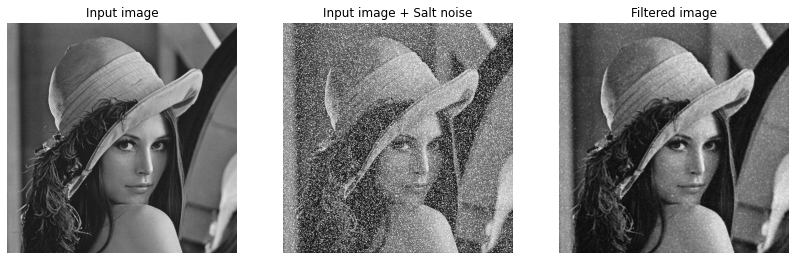

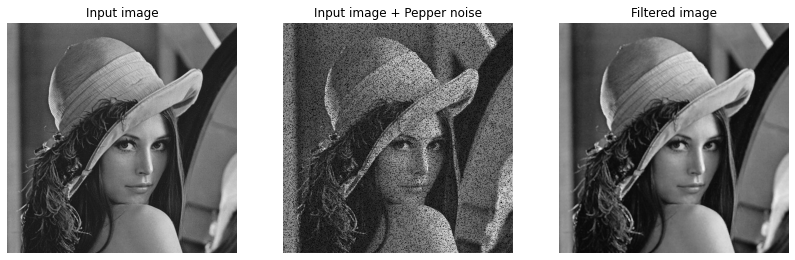

In [ ]:
plt.figure(figsize=(14,10))
# Add salt noise only
lena_noisy_salt = salt_pepper_noise(lena_gs, 1, 0.2)
plt.subplot(1,3,1), plt.imshow(lena_gs, cmap=plt.cm.gray), plt.title('Input image'), plt.axis('off')
plt.subplot(1,3,2), plt.imshow(lena_noisy_salt, cmap=plt.cm.gray), plt.title('Input image + Salt noise'), plt.axis('off')
# Apply filter
filtered_lena_noisy_salt = contraharmonic_mean(lena_noisy_salt, (3,3), -1.5)
plt.subplot(1,3,3), plt.imshow(filtered_lena_noisy_salt, cmap=plt.cm.gray), plt.title('Filtered image'), plt.axis('off')
plt.show()

plt.figure(figsize=(14,10))
# Add pepper noise only
lena_noisy_pepper = salt_pepper_noise(lena_gs, 0, 0.2)
plt.subplot(1,3,1), plt.imshow(lena_gs, cmap=plt.cm.gray), plt.title('Input image'), plt.axis('off')
plt.subplot(1,3,2), plt.imshow(lena_noisy_pepper, cmap=plt.cm.gray), plt.title('Input image + Pepper noise'), plt.axis('off')
# Apply filter
filtered_lena_noisy_pepper = contraharmonic_mean(lena_noisy_pepper, (3,3), 1.5)
plt.subplot(1,3,3), plt.imshow(filtered_lena_noisy_pepper, cmap=plt.cm.gray), plt.title('Filtered image'), plt.axis('off')
plt.show()